In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder as lb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE, \
mean_absolute_percentage_error as MAPE , r2_score as r2
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('Predict Price of Airline Tickets.csv')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
lbc = lb()
data = df.apply(lbc.fit_transform)

In [6]:
x = data.drop('Price',axis=1).values
y = data['Price'].values

In [7]:
x.shape,y.shape

((10683, 10), (10683,))

In [8]:
y = y.reshape(y.shape[0],1)

In [9]:
x.shape,y.shape

((10683, 10), (10683, 1))

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=1)

In [11]:
model = RandomForestRegressor()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

C:\Users\amira\AppData\Local\Temp\ipykernel_2168\2676188207.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


In [12]:
def evaluate_model(y1,y2):
    print("MAE: ", MAE(y1,y2))
    print("MSE: ", MSE(y1,y2))
    print("R Squared: ", r2(y1,y2))
    print("MAPE: ", MAPE(y1,y2))
    print("RMSE: ", np.sqrt(MSE(y1,y2)))

In [13]:
evaluate_model(y_pred,y_test)

MAE:  100.46558768648318
MSE:  29354.0464453718
R Squared:  0.8993485472192215
MAPE:  0.22684466793707128
RMSE:  171.3302263039765


In [14]:
# extract important features
def getImportantFeature(dataFrame,modelUsed):
    columns_names = dataFrame.columns.tolist()
    importance = modelUsed.feature_importances_
    indices = np.argsort(importance)
    plt.barh(range(len(indices)), importance[indices], color='b', align='center')
    plt.yticks(range(len(indices)),[columns_names[i] for i in indices])
    plt.show()

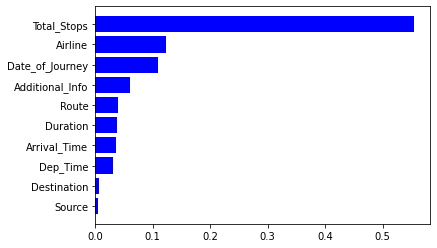

In [15]:
getImportantFeature(data,model)

In [16]:
evaluate_model(y_pred,y_test)

MAE:  100.46558768648318
MSE:  29354.0464453718
R Squared:  0.8993485472192215
MAPE:  0.22684466793707128
RMSE:  171.3302263039765


In [17]:
def metricesFromCrossValidation(modelUsed,XData,YData,*,n):
    cv = KFold(n_splits=n, random_state=1,shuffle=True)
    scores_MAE = cross_val_score(modelUsed,XData,YData,scoring='neg_mean_absolute_error',cv = cv,n_jobs=-1)
    avg_MAE = np.mean(np.absolute(scores_MAE))
    scores_MSE = cross_val_score(modelUsed,XData,YData,scoring='neg_mean_squared_error',cv = cv,n_jobs=-1)
    avg_MSE = np.mean(np.absolute(scores_MSE))
    print("MAE_Cross Validation: ", avg_MAE)
    print("MSE_Cross Validation: ", avg_MSE)

In [18]:
metricesFromCrossValidation(model,x,y,n=25)

MAE_Cross Validation:  92.18992228815698
MSE_Cross Validation:  27157.28308457023


In [19]:
# try best number of iterations to nearby results to the evaluate model metrices above
for i in range(10,41):
    if i % 5 == 0:
        print(f'-------n = {i}----------')
        metricesFromCrossValidation(model,x,y,n=i)

-------n = 10----------
MAE_Cross Validation:  93.64949778566825
MSE_Cross Validation:  27655.458401895845
-------n = 15----------
MAE_Cross Validation:  93.00778792713639
MSE_Cross Validation:  27498.50188390212
-------n = 20----------
MAE_Cross Validation:  92.3955985841124
MSE_Cross Validation:  27079.482533622497
-------n = 25----------
MAE_Cross Validation:  92.29744187529936
MSE_Cross Validation:  27116.496883855794
-------n = 30----------
MAE_Cross Validation:  92.20127043555097
MSE_Cross Validation:  27077.39188074101
-------n = 35----------
MAE_Cross Validation:  92.0546269347199
MSE_Cross Validation:  27272.851815949478
-------n = 40----------
MAE_Cross Validation:  91.87729873830378
MSE_Cross Validation:  27017.33542212092
